# Read Data

In [64]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from functools import partial
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [65]:
to_datetime_fmt = partial(pd.to_datetime, format='%d/%b/%Y:%H:%M:%S %z')

In [66]:
bitcoin_series = pd.read_csv('localbtcAUD.csv')
bitcoin_series.columns = ['datetime', 'price','volum']
bitcoin_series['datetime'] = pd.to_datetime(bitcoin_series['datetime'], unit='s')
bitcoin_series['date'] = pd.Series(bitcoin_series['datetime'].dt.date)
bitcoin_series['date'] = pd.to_datetime(bitcoin_series['date'])
# transfer unit from seconds to days
# day,sec = str(bitcoin_series['datetime']).split(' ')
# bitcoin_series['datetime'] = bitcoin_series['datetime'].iloc[:, 0:9]
bitcoin_series.dtypes


datetime    datetime64[ns]
price              float64
volum              float64
date        datetime64[ns]
dtype: object

data from: http://api.bitcoincharts.com/v1/csv/

# Transform dataset to day unit

In [67]:
bitcoin_series_2 = bitcoin_series[['date','price']].groupby(['date']).agg(['min','mean','max'], axis='columns').reset_index()
bitcoin_series_2.columns = ['date','min_price','mean_price','max_price']
bitcoin_series_2.head()
bitcoin_series_2.dtypes
bitcoin_series_2.set_index('date',inplace =True)


In [68]:
ts = bitcoin_series_2['mean_price']
ts.head(10)

date
2013-03-12    48.092632
2013-03-13    50.885385
2013-03-14    51.500000
2013-03-15    55.371667
2013-03-16    52.487273
2013-03-17    52.783750
2013-03-18    52.062222
2013-03-19    57.089167
2013-03-20    62.148889
2013-03-21    69.030952
Name: mean_price, dtype: float64

# Build ARIMA method

In [69]:
def draw_trend(timeSeries, size):
    f = plt.figure(facecolor='white')
    # 对size个数据进行移动平均
    rolmean = timeSeries.rolling(window=size).mean()
    # 对size个数据进行加权移动平均
    rol_weighted_mean = pd.ewma(timeSeries, span=size)

    timeSeries.plot(color='blue', label='Original')
    rolmean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()

def draw_ts(timeSeries):
    #f = plt.figure(facecolor='white')
    timeSeries.plot(color='blue')
    plt.show()

'''
　　Unit Root Test
   The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
   root, with the alternative that there is no unit root. That is to say the
   bigger the p-value the more reason we assert that there is a unit root
'''
def testStationarity(ts):
    dftest = adfuller(ts)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

# 自相关和偏相关图，默认阶数为31阶
def draw_acf_pacf(ts, lags=31):
    f = plt.figure(facecolor='white')
    ax1 = f.add_subplot(211)
    plot_acf(ts, lags=31, ax=ax1)
    ax2 = f.add_subplot(212)
    plot_pacf(ts, lags=31, ax=ax2)
    plt.show()

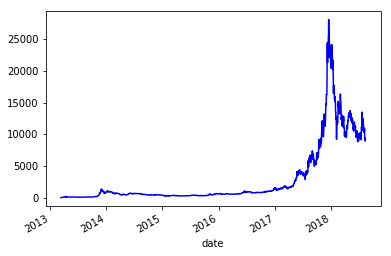

In [70]:
#Show the history all the time
draw_ts(ts)

/Users/qianchenghao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,adjust=True,ignore_na=False).mean()
  


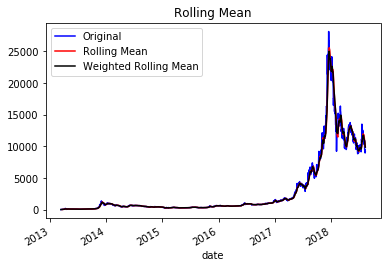

In [71]:
draw_trend(ts,10)

In [72]:
#Show the data from 2018-05-01 until 2018-08-01

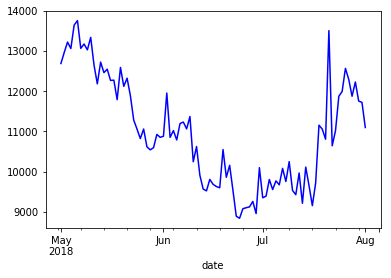

In [73]:
ts = ts['2018-05-01' : '2018-8-01']
draw_ts(ts)

In [74]:
# Moving average

/Users/qianchenghao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,adjust=True,ignore_na=False).mean()
  


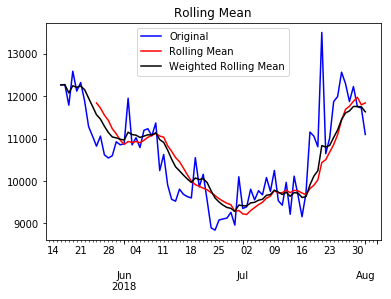

In [137]:
draw_trend(ts,10)

In [76]:
#testStationarity
testStationarity(ts)

Test Statistic                 -1.740360
p-value                         0.410447
#Lags Used                      2.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64

In [77]:
#Draw acf&pcaf

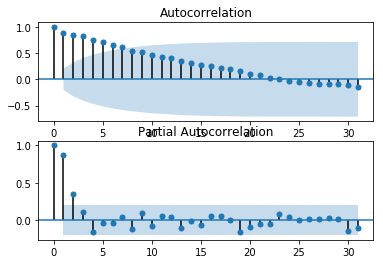

In [78]:
draw_acf_pacf(ts, lags=31)

In [79]:
#Stationary processing

/Users/qianchenghao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,adjust=True,ignore_na=False).mean()
  


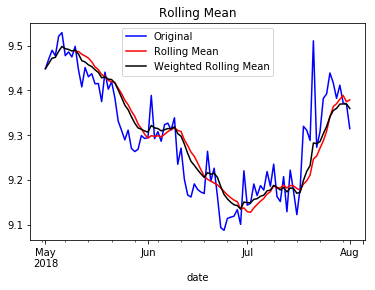

In [80]:
ts_log = np.log(ts)
draw_trend(ts_log,10)

/Users/qianchenghao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,adjust=True,ignore_na=False).mean()
  


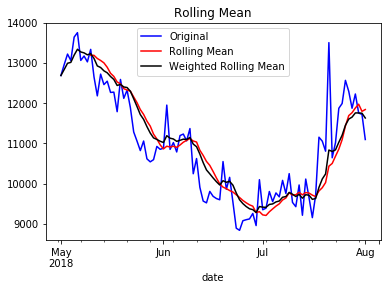

In [83]:
draw_trend(ts,10)

/Users/qianchenghao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=5,min_periods=0,adjust=True,ignore_na=False).mean()
  


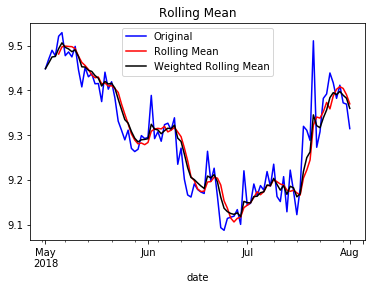

In [84]:
draw_trend(ts_log, 5)

In [131]:
diff_6 = ts_log.diff(6)
diff_6.dropna(inplace=True)
diff_6_1 = diff_6.diff(1)
diff_6_1.dropna(inplace=True)
testStationarity(diff_6_1)

Test Statistic                 -4.135499
p-value                         0.000846
#Lags Used                     12.000000
Number of Observations Used    73.000000
Critical Value (1%)            -3.523284
Critical Value (5%)            -2.902031
Critical Value (10%)           -2.588371
dtype: float64

In [132]:
#Decomposition

In [133]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model="additive")

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

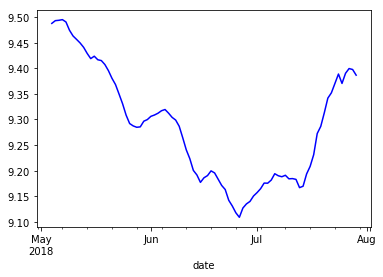

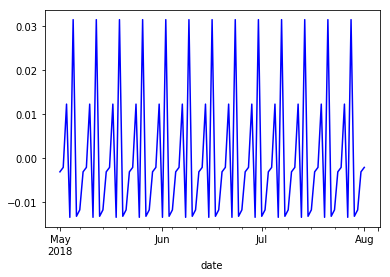

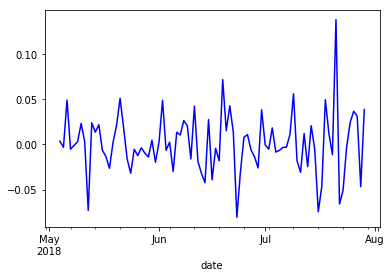

In [134]:
draw_ts(trend)
draw_ts(seasonal)
draw_ts(residual)

In [135]:
rol_mean = ts_log.rolling(window=12).mean()
rol_mean.dropna(inplace=True)
ts_diff_1 = rol_mean.diff(1)
ts_diff_1.dropna(inplace=True)
testStationarity(ts_diff_1)


Test Statistic                 -1.775718
p-value                         0.392582
#Lags Used                      1.000000
Number of Observations Used    79.000000
Critical Value (1%)            -3.515977
Critical Value (5%)            -2.898886
Critical Value (10%)           -2.586694
dtype: float64

In [138]:
ts_diff_2 = ts_diff_1.diff(2)
ts_diff_2.dropna(inplace=True)
testStationarity(ts_diff_2)

Test Statistic                 -4.175885
p-value                         0.000724
#Lags Used                     11.000000
Number of Observations Used    67.000000
Critical Value (1%)            -3.531955
Critical Value (5%)            -2.905755
Critical Value (10%)           -2.590357
dtype: float64

/Users/qianchenghao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=12,min_periods=0,adjust=True,ignore_na=False).mean()
  


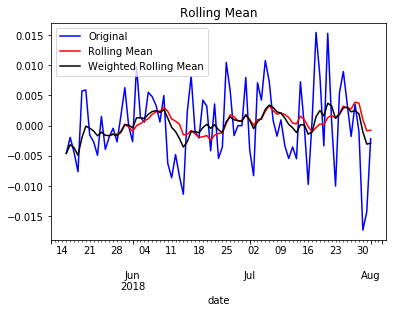

In [141]:
draw_trend(ts_diff_2,12)

In [142]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(ts_diff_2, order=(1, 1)) 
result_arma = model.fit( disp=-1, method='css')

In [143]:
predict_ts = result_arma.predict()
# 一阶差分还原
diff_shift_ts = ts_diff_2.shift(1)
diff_recover_1 = predict_ts.add(diff_shift_ts)
# 再次一阶差分还原
rol_shift_ts = rol_mean.shift(1)
diff_recover = diff_recover_1.add(rol_shift_ts)
# 移动平均还原
rol_sum = ts_log.rolling(window=11).sum()
rol_recover = diff_recover*12 - rol_sum.shift(1)
# 对数还原
log_recover = np.exp(rol_recover)
log_recover.dropna(inplace=True)

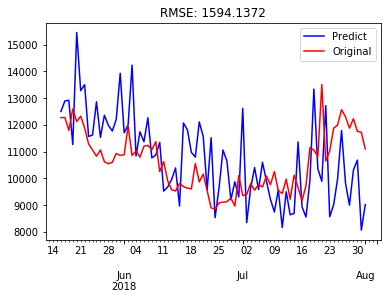

In [144]:
ts = ts[log_recover.index]  # 过滤没有预测的记录
plt.figure(facecolor='white')
log_recover.plot(color='blue', label='Predict')
ts.plot(color='red', label='Original')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((log_recover-ts)**2)/ts.size))
plt.show()